# This is the notebook to make Fig. 3 for COSN manuscript
By Xiaobians, Chuanpeng Hu, and Qing Wang(Vincent)

In [1]:
# from pathlib import Path
import sys
proj_path_str='/scratch/COSN_Manuscript'
sys.path.append(proj_path_str)
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
data_dir = Path(proj_path_str) / 'data'
fig_dir = Path(proj_path_str) / 'figs'

data_tab_file  = data_dir / 'cosn_events.csv'
data_df = pd.read_csv(data_tab_file, sep=',', header=0, index_col=None)

# format time string
def date2x(df, event_, MODE):
    from datetime import datetime
    same_df = df[df['Events']!=event_].copy()
    tmp_df  = df[df['Events']==event_].copy()
    if MODE=='y-m':
        tmp_df['Date'] = [datetime.strptime(x.strip(' '), '%m/%d/%Y').strftime("%Y-%m") for x in tmp_df['Date']]
    elif MODE=='y.m':
        same_df['Date'] = [datetime.strptime(x.strip(' '), '%Y-%m').strftime("%Y.%m") for x in same_df['Date']]
        tmp_df['Date']  = [datetime.strptime(x.strip(' '), '%m/%d/%Y').strftime("%Y.%m") for x in tmp_df['Date']]
    elif MODE=='DateTime':
        same_df['Date'] = [datetime.strptime(x.strip(' '), '%Y-%m') for x in same_df['Date']]
        tmp_df['Date']  = [datetime.strptime(x.strip(' '), '%m/%d/%Y') for x in tmp_df['Date']]
    else:
        print("Nothing done...")
        return df
    return pd.concat([same_df, tmp_df])

data_df=date2x(data_df, 'OpenTrans', 'DateTime')
display(data_df)
print('Summary statistics of open science events:')
data_df.groupby('Events').describe()

,Events,Date,Reads,Topic
0,OpenTalks,2020-05-01,4914,预测论文可重复性 & 70个团队如何实锤fMRI分析的灵活性
1,OpenTalks,2020-06-01,3153,如何在神经科学中使用人工神经网络
2,OpenTalks,2020-07-01,2925,心理科学加速器项目(The Psychological Science Accelerator)
3,OpenTalks,2020-07-01,369,基于神经影像对幼儿认知进行个体化的预测
4,OpenTalks,2020-08-01,1476,社会认知中的计算精神病学
...,...,...,...,...
154,OpenTrans,2018-10-16,5755,开放数据 | 心理学开放数据集合
155,OpenTrans,2018-11-08,1621,[Pre-print]心理学研究的元分析报告标准：现状与建议
156,OpenTrans,2018-04-29,1517,统计知识 | Mini Meta-analysis或单论文中的元分析
157,OpenTrans,2018-03-25,893,小技巧｜如何对你的研究进行预先备案（pre-register）？


Summary statistics of open science events:


Reads                                                            \
              count         mean          std     min     25%     50%     75%   
Events                                                                          
OpenMinds      29.0  1158.379310   457.109194   607.0   839.0  1023.0  1345.0   
OpenPlus        3.0  2573.666667   896.590393  1887.0  2066.5  2246.0  2917.0   
OpenTalks      27.0  1954.962963  1252.856044   369.0  1174.5  1502.0  2305.0   
OpenTrans      63.0  2321.015873  2485.619722   238.0   792.5  1413.0  2877.5   
OpenTutorials  12.0  1769.000000   720.492256   809.0  1081.0  1676.0  2237.5   
WE LOST        25.0   649.760000   333.749442   299.0   429.0   589.0   721.0   

                        
                   max  
Events                  
OpenMinds       2486.0  
OpenPlus        3588.0  
OpenTalks       5929.0  
OpenTrans      13519.0  
OpenTutorials   2974.0  
WE LOST         1775.0

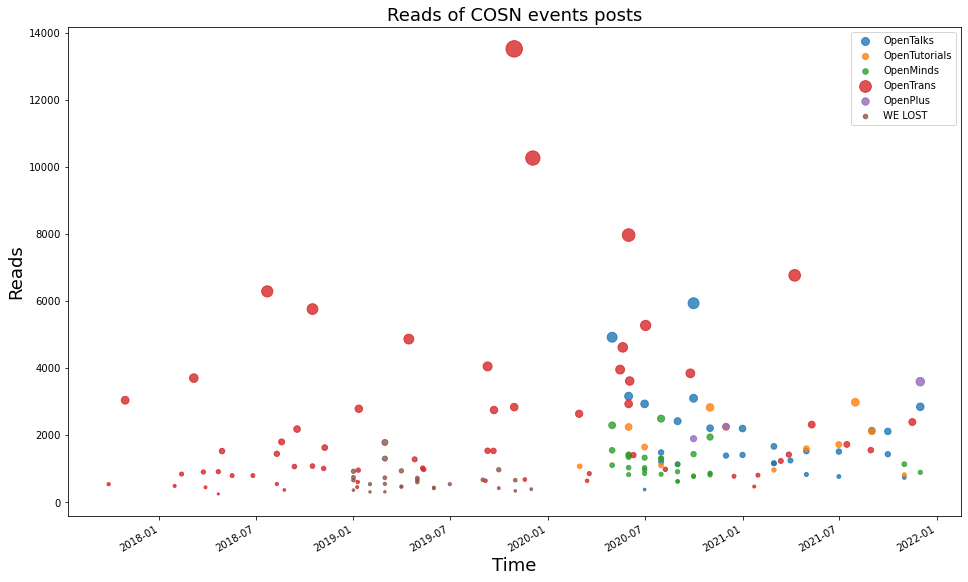

In [2]:
# simple line plot
import matplotlib.dates

save_fig=0
vis_df = data_df.copy()
events_list = ['OpenTalks', 'OpenTutorials', 'OpenMinds', 'OpenTrans', 'OpenPlus', 'WE LOST']
#vis_df['Date'] = [custom_date(float(x)) for x in vis_df['Date']]

figure_size=(16, 10)
x_tick_rotation=90
f1, ax_lineplot = plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray') 

for event_str in events_list:
    plt.scatter(vis_df[vis_df['Events']==event_str].Date, vis_df[vis_df['Events']==event_str].Reads, alpha=0.8, sizes=vis_df[vis_df['Events']==event_str].Reads/50)

plt.xlabel('Time', fontsize=18)
plt.ylabel('Reads', fontsize=18)
plt.title('Reads of COSN events posts', fontsize=18)
plt.legend(events_list)
plt.gcf().autofmt_xdate()

if save_fig: print('saving...'); f1.savefig(( fig_dir / 'Fig3-cosn_events_scatter.jpg'), dpi=300, bbox_inches='tight', pad_inches=0.1);

In [ ]:
# need to visualize
vis_df = data_df.copy()
vis_df['Date'] = [float(x) for x in vis_df['Date']]

figure_size=(20, 12)
x_tick_rotation=90
f2, ax_newplot = plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray') 
sns.stripplot(y="Date", x="Reads", hue="Events",
              data=vis_df, dodge=True, alpha=.25, zorder=1, ax=ax_newplot)

for label in ax_newplot.get_xticklabels():
    label.set_rotation(x_tick_rotation)
    
if save_fig: print('saving...'); f2.savefig(( fig_dir / 'Fig3-cosn_events_patchplot.jpg'), dpi=300, bbox_inches='tight', pad_inches=0.1);

In [10]:
# incase we need
# format time string
def custom_date(date_float):
    if date_float<2018.01:
        customed_date = 2017.00
        return customed_date
    elif date_float<2018.12:
        customed_date = 2018.00
        return customed_date
    elif date_float<2019.12:
        customed_date = 2019.00
    else:
        return date_float